In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='rolling_avg'>

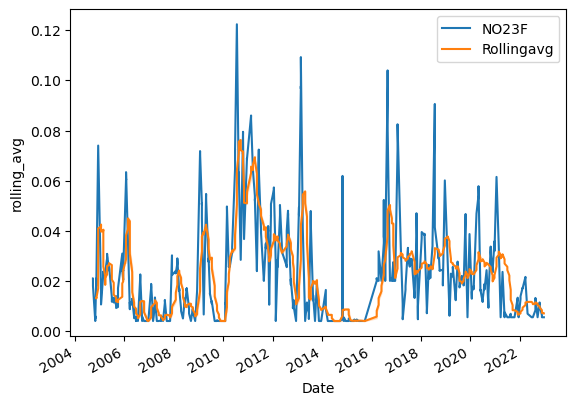

In [39]:
##SAP station
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files 2024' #changed from Files folder 4/25/24
all_files = glob.glob(path + "/sapdcnut*.csv")

li = []

for filename in all_files:
    df_sap = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_sap)

df_sap = pd.concat(li, axis=0, ignore_index=True).dropna(subset=['NO23F']).dropna(axis=1)

##Begin:
df_sap = df_sap[df_sap['NO23F'] < 0.9] ##removes several extremely large outliers
df_sap['Date'] = pd.to_datetime(df_sap['DateTimeStamp'])
df_sap

##creating a rolling average
df_sap['rolling_avg' ] = df_sap.NO23F.rolling(14).mean()

g = df_sap.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Rollingavg')

C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='rolling_avg'>

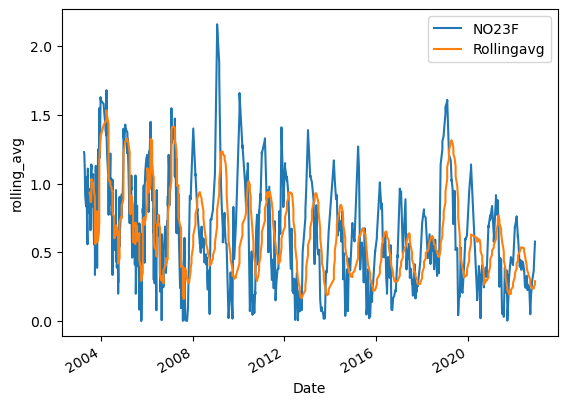

In [22]:
##CBM station
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files 2024'
all_files = glob.glob(path + "/cbmrrnut*.csv")

li = []

for filename in all_files:
    df_cbm = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_cbm)

df_cbm = pd.concat(li, axis=0, ignore_index=True).dropna(subset=['NO23F']).dropna(axis=1)

##Begin:
df_cbm['Date'] = pd.to_datetime(df_cbm['DateTimeStamp'])
df_cbm

##creating a rolling average
df_cbm['rolling_avg' ] = df_cbm.NO23F.rolling(14).mean()

g = df_cbm.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Rollingavg')

C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='rolling_avg'>

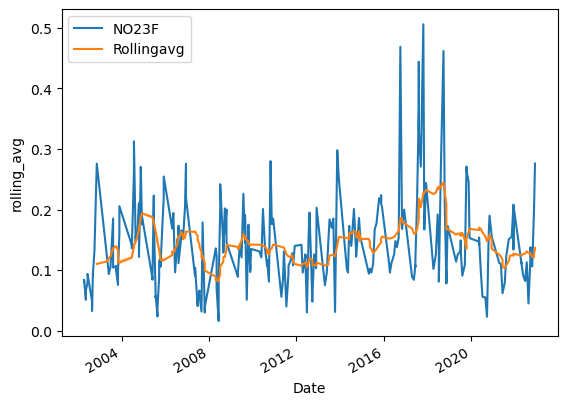

In [23]:
##GRB station

##PC:
path = r'C:/Users/arj26323/Documents/Data/NERR data/Files 2024'
all_files = glob.glob(path + "/grbsqnut*.csv")

li = []

for filename in all_files:
    df_grb = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_grb)

df_grb = pd.concat(li, axis=0, ignore_index=True).dropna(subset=['NO23F']).dropna(axis=1)

##Begin:
df_grb['Date'] = pd.to_datetime(df_grb['DateTimeStamp'])
df_grb

##creating a rolling average
df_grb['rolling_avg' ] = df_grb.NO23F.rolling(14).mean()

g = df_grb.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'Rollingavg')

C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Nitrate + nitrite (mg/L)')

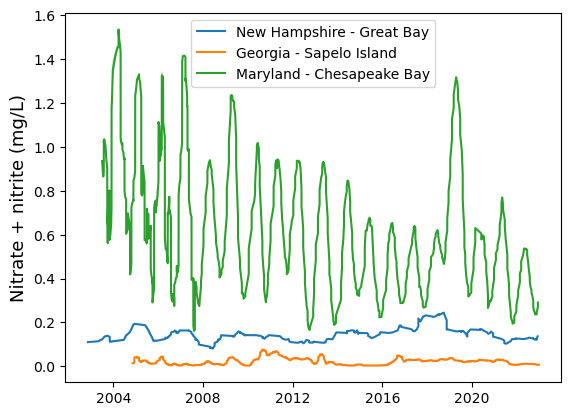

In [24]:
fig, ax = plt.subplots()

sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'New Hampshire - Great Bay')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Georgia - Sapelo Island')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Maryland - Chesapeake Bay')

fig
plt.xlabel("")
plt.ylabel("Nitrate + nitrite (mg/L)", fontsize = 13)

C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\gee\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Nitrate + nitrite (mg/L)')

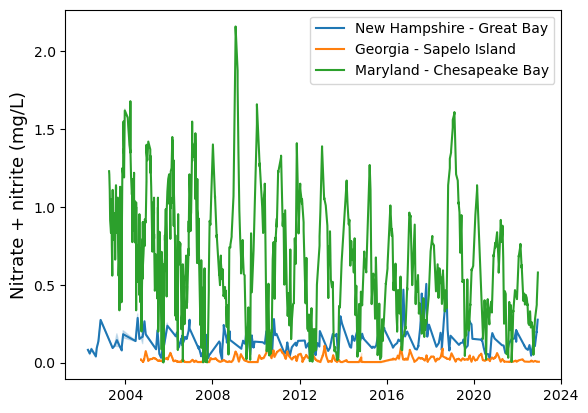

In [25]:
fig2, ax = plt.subplots()

sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_grb,
             label = 'New Hampshire - Great Bay')
sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_sap,
             label = 'Georgia - Sapelo Island')
sns.lineplot( x = 'Date',
             y = 'NO23F',
             data = df_cbm,
             label = 'Maryland - Chesapeake Bay')

fig2
plt.xlabel("")
plt.ylabel("Nitrate + nitrite (mg/L)", fontsize = 13)

In [14]:
# df = pd.merge(df_sap, df_grb, df_cbm)
# df['Date'] = pd.to_datetime(df['DateTimeStamp'])

# print(len(df['NO23F']))

In [13]:
# # my_path = os.path.abspath('/Users/asariversjulien/Documents/Georgia/Project') ##mac
# my_path = os.path.expanduser('~/Downloads') ##pc
# my_file = 'nuts.png'
# fig2.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight', dpi = 300)

In [60]:
#Station coordinates (FLATS around stations?)

stazioni = pd.read_csv('C:/Users/arj26323/Documents/Data/NERR data/All_stations2.csv')

# print(stazioni['Station Code'].unique())

stazioni = stazioni[stazioni['Station Code'].str.contains('nut')]

stazioni.rename(columns={"Latitude ": "Latitude", " Longitude": "Longitude"}, inplace= True)

dfs = stazioni[['Station Code', 'Station Name', 'Latitude', 'Longitude']]
dfs

Station Code                              Station Name  Latitude  \
0     acebbnut    Big Bay                                   32.49410   
3     acefcnut    Fishing Creek                             32.63593   
5     acemcnut    Mosquito Creek                            32.55580   
8     acespnut    St. Pierre                                32.52800   
11    aceeinut    Edisto Island                             32.50400   
..           ...                                       ...       ...   
340   wkbwsnut    Weather Station                           30.41481   
344   wqbcrnut    Childs River                              41.57980   
347   wqbmhnut    Menauhant                                 41.55260   
349   wqbmpnut    Metoxit Point                             41.56890   
353   wqbslnut    Sage Lot                                  41.55420   

     Longitude  
0    -80.32410  
3    -80.36556  
5    -80.43800  
8    -80.36144  
11   -80.32470  
..         ...  
340  -87.82600  
344  -70.53090  
347  -70.54850  
349  -70.52160  
353  -70.50840  

[152 rows x 4 columns]

In [3]:
#Test

import ee
import geemap

ee.Initialize()

stazioni = pd.read_csv('C:/Users/arj26323/Documents/Data/NERR data/All_stations2.csv')

# print(stazioni['Station Code'].unique())

stazioni = stazioni[stazioni['Station Code'].str.contains('nut')]

stazioni.rename(columns={"Latitude ": "Latitude", " Longitude": "Longitude"}, inplace= True)

dfs = stazioni[['Station Code', 'Station Name', 'Latitude', 'Longitude']]

dfx = dfs[dfs['Station Code']=='sapdcnut  '] #two spaces put in after each code for some stupid fucking reason

px = ee.Geometry.Point([dfx.iloc[0,3], dfx.iloc[0,2]])

def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL5(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.972*(RED-SWIR)/(RED+SWIR)-0.008) - 41.2*(0.991*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)-0.0014)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))


def addFLATSL8(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.841*(RED-SWIR)/(RED+SWIR) - 0.019) - 41.2*(0.771*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1) + 0.011)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL9(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(1.225*(RED-SWIR)/(RED+SWIR) + 0.096) - 41.2*(1.038* (NIR-RED)/(NIR+6*RED-7.5*BLUE+1) - 0.004)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

def add_date_band(image):
    # Get the acquisition date
    date = ee.Date(image.get('system:time_start'))
    
    # Convert the date to milliseconds since Unix epoch
    date_millis = date.millis()
    
    # Create an image with a single band representing the acquisition date
    date_image = ee.Image.constant(date_millis).int64().rename('acquisition_date')
    
    # Add the date image as a band to the original image
    return image.addBands(date_image)

gce_lter = geemap.shp_to_ee('F:/Wetlands shapefiles/GCE domain/GCE_LTER_boundary.shp')

#Loading gee datasets
l8_col = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(gce_lter) \
    .map(maskL5sr).map(addFLATSL8).map(add_date_band)

l7_col = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1984, 2023,'year')) \
    .filterBounds(gce_lter)\
    .map(maskL5sr).map(addFLATSL7).map(add_date_band)

l5_col = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(1984, 2023,'year')) \
    .filterBounds(gce_lter)\
    .map(maskL5sr).map(addFLATSL5).map(add_date_band)

l9_col = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
    .filter(ee.Filter.calendarRange(1998, 2023,'year')) \
    .filterBounds(gce_lter)\
    .map(maskL5sr).map(addFLATSL9).map(add_date_band)


bb = ee.Geometry.Polygon([[-81.29, 31.425], [-81.29, 31.46], [-81.27, 31.46],[-81.27, 31.425]])

ultra_col = l5_col.merge(l7_col).merge(l8_col).merge(l9_col)

# ultra = ultra_col.filter(ee.Filter.calendarRange(1984, 2023,'year')).filterBounds(flux_ga)
ultra = ultra_col.filter(ee.Filter.calendarRange(2004, 2024,'year')).map(lambda image: image.clip(px)) \
    .filter(ee.Filter.lte('CLOUD_COVER_LAND', 50))

def point_extract(image):
    
    feature = ee.Image(image).sampleRegions(
        collection=px,
        scale=30,
        geometries=True)
    
    return feature

feature_list = ultra.map(point_extract).flatten().toList(ultra.size())
values_list = []

# Loop through the feature list and extract values
for i in range(feature_list.size().getInfo()):
    feature = ee.Feature(feature_list.get(i))
    properties = feature.toDictionary()
    values_list.append(properties.getInfo())

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(values_list)

# Print the DataFrame
print(df)


     QA_PIXEL  QA_RADSAT  SR_ATMOS_OPACITY     SR_B1     SR_B2     SR_B3  \
0        5440          0             402.0  0.050057  0.070902  0.060783   
1        5440          0             459.0  0.029625  0.040763  0.040130   
2        5440          0             214.0  0.036060  0.047528  0.045492   
3        5440          0             250.0  0.035180  0.050580  0.044145   
4        5440          0             288.0  0.033090  0.040212  0.043155   
..        ...        ...               ...       ...       ...       ...   
296     21824          0               NaN  0.025775  0.033310  0.051185   
297     22080          0               NaN  0.045327  0.054567  0.071645   
298     21824          0               NaN  0.031853  0.036472  0.044970   
299     21824          0               NaN  0.053468  0.057345  0.062900   
300     21824          0               NaN  0.031220  0.038700  0.044310   

        SR_B4     SR_B5     SR_B7  SR_CLOUD_QA  ...  ST_EMIS  ST_EMSD  ST_QA  \
0    0.